<a href="https://colab.research.google.com/github/rdose/ia3-ML_Exercises/blob/main/ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOS TRES TENSORES
- Pedro Dimas Martínez
- Juan Contell Husillos
- Rafael Domenech Serrano

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

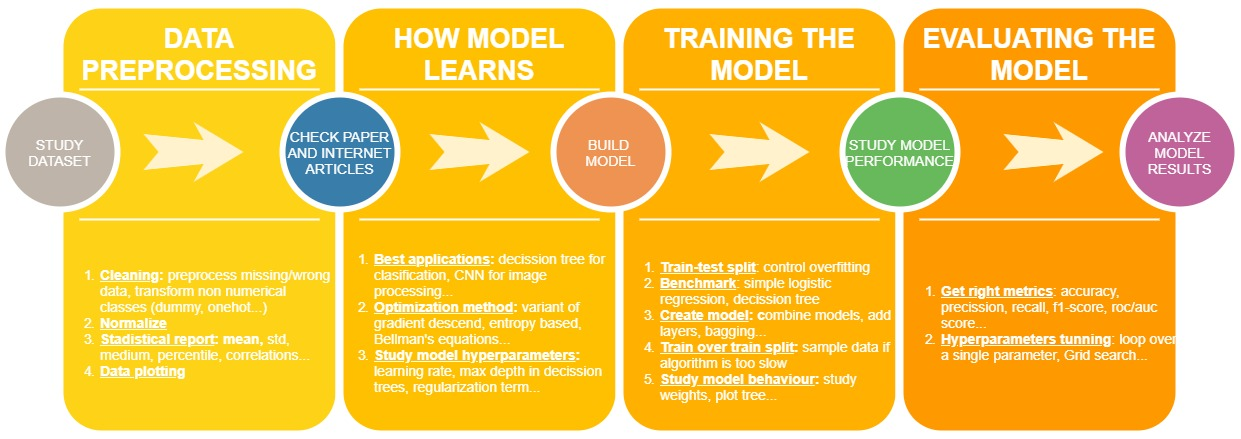

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [74]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [75]:
dataset = sns.load_dataset("penguins")
print(f"There were {dataset.isna().values.sum()} NaN")
df = dataset.dropna()

There were 19 NaN


In [76]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(df.iloc[:,:-1]) #obtenemos los dummies quitando la objetivo 'sex' que es la ultima
Y = df.loc[:,['sex']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

#Normalise features wrt train. Not quite needed for decision tree but needed for some of the other algorithms
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Benchmark: Decision Tree

In [77]:
#Modelo de referencia
from sklearn.tree import DecisionTreeClassifier
ref_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=12)
ref_model.fit(X_train, Y_train)
print("Decision Tree:")
print("Train = %.3f" % ref_model.score(X_train, Y_train))
print("Test = %.3f" % ref_model.score(X_test, Y_test)) 
print("Delta = %.3f" % (ref_model.score(X_train, Y_train) - ref_model.score(X_test, Y_test))) # Diferencia entre X_test y X_train ayuda a detectar overfitting (deberia ser positivo)

Decision Tree:
Train = 0.928
Test = 0.905
Delta = 0.023


## Logistic Regresion

In [78]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1, max_iter=100)
#model = LogisticRegression()
lr_model.fit(X_train, Y_train)
print("Logistic Regression:")
print("Train = %.3f" % lr_model.score(X_train, Y_train))
print("Test = %.3f" % lr_model.score(X_test, Y_test)) 
print("Delta = %.3f" % (lr_model.score(X_train, Y_train) - lr_model.score(X_test, Y_test))) # Diferencia entre X_test y X_train es simbolo de overfitting (deberia ser positivo)

Logistic Regression:
Train = 0.932
Test = 0.917
Delta = 0.015


### Conclusion
The performance of this model varies significantly with the initialisation, scoring often better in test than in train which perhaps indicates that the dataset is too small for this model. I've found that the solver has a significant effect **if the data is not normalised** as indicated in [^1].

Main hyperparams to tune in Logistic Regression:

- `max_iter`: Max iterations that the solvers can take to converge. Does not have a very significant effect
- `C`: is the inverse regularisation coefficient. This is used to penalise the size of the coefficients to avoid overfitting. Being inverse 1 means no regularisation. This sort of prevents the decision boundaries to become too complex (can be seen as smoothing/avoiding wiggly decision boundaries)
- `fit_intercept`: If flse intercept will be forced to 0 (no intercept) 


   

References
- [^1]: https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451


## Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
#Model and scores
nb_model= GaussianNB().fit(X_train, Y_train)   #model= GaussianNB(priors=[0.45,0.55]).fit(X_train, Y_train)
print("Naive Bayes:")
print("Train = %.3f" % nb_model.score(X_train, Y_train))
print("Test = %.3f" % nb_model.score(X_test, Y_test)) 
print("Delta = %.3f" % (nb_model.score(X_train, Y_train) - nb_model.score(X_test, Y_test))) 

Naive Bayes:
Train = 0.843
Test = 0.821
Delta = 0.022


### Conclusion
Naive Bayes conclussions After some trials, it is been find the next: 
Naive Bayes does not work properly in this exercise. 

*   Naive Bayes does not work properly in this exercise. 
*   A big variation of the scores has been found. Besides, the test score is bigger than the training one many times. It could mean that the dataset is too small for the way Naive Bayes works.


*   When trying to adjust the hyperparameter prior, we find worse results. It is probably due to the fact that there are only 2 variables whose probabilities of appereance are better adjusted by the algorithm.

## Support Vector Machines

In [80]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1)
#model = svm.SVC(kernel='poly', degree=3, gamma='auto', coef0=0, C=1)
#model = svm.SVC(kernel='sigmoid', gamma='auto', coef0=0, C=1)
svm_model.fit(X_train, Y_train)
print("Support Vector Machines:")
print("Train = %.3f" % svm_model.score(X_train, Y_train))
print("Test = %.3f" % svm_model.score(X_test, Y_test)) 
print("Delta = %.3f" % (svm_model.score(X_train, Y_train) - svm_model.score(X_test, Y_test))) 

Support Vector Machines:
Train = 0.932
Test = 0.940
Delta = -0.009


###  Conclusion

Support Vector Machines apparently performs at the same level or better sometimes than the Decision tree however it does score higher in test than in train often times indicating perhaps that there's not enough data for this algorithm.

Main hyperparams to tune:

- `kernel`: transformations of original data to map into a new space
   - `linear` — No transformation
   - `poly` — Use a polynomial for the transformation. The degree can is chosen using 'degree' and the independent term using 'coef0'
   - `rbf` — Use Gaussian radial basis function for the transformation
   - `sigmoid` — Use the sigmoid function for the transformation. The independent term can be adjusted using 'coef0'
- `Gamma`: (for `rbf`, `poly` and `sigmoid` kernels) Defines the influence of every training point. A high value means that points close to the decision boundary have more influence on the shape of the boundary than the points that are far from it. A low value will result in a less wiggly boundary than a large value. To control overfitting essentially.
- `C`: is the inverse regularisation coefficient. This is used to penalise the size of the coefficients to avoid overfitting. Being inverse 1 means no regularisation. This sort of prevents the decision boundaries to become too complex (can be seen as smoothing/avoiding wiggly decision boundaries). To control overfitting essentially.

References

http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf


# Summary

In [81]:
test_scores = [ref_model.score(X_test, Y_test), lr_model.score(X_test, Y_test), nb_model.score(X_test, Y_test), svm_model.score(X_test, Y_test)]
train_scores = [ref_model.score(X_train, Y_train), lr_model.score(X_train, Y_train), nb_model.score(X_train, Y_train), svm_model.score(X_train, Y_train)]
labels = ['Decision tree', 'Logistic regression', 'Naive Bayes', 'Support Vector Machine']
pd.DataFrame(np.array([train_scores,test_scores]), columns=labels, index=['Train score', 'Test score'])

,Decision tree,Logistic regression,Naive Bayes,Support Vector Machine
Train score,0.927711,0.931727,0.843373,0.931727
Test score,0.904762,0.916667,0.821429,0.940476
